<a href="https://colab.research.google.com/github/gh-fatima/Sine-Model-DL/blob/main/SineModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.0.0-beta0

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

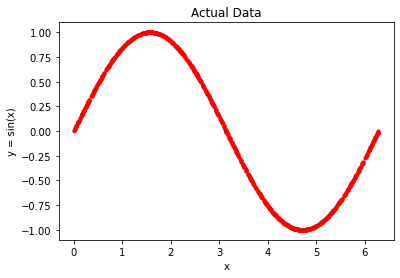

In [6]:
# Generating 1000 samples using y = sin(x) for x = 0:2pi
SAMPLES=1000
SEED= 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random.uniform(low=0.0,high=2*np.pi,size=SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)
plt.plot(x_values,y_values,'r.')
plt.xlabel('x')
plt.ylabel('y = sin(x)')
plt.title('Actual Data')
plt.show()

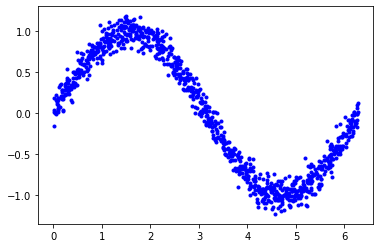

In [7]:
# Adding a small random noise to the data 
y_values += 0.1*np.random.randn(*y_values.shape)
plt.plot(x_values,y_values,'b.')
plt.show()

In [8]:
# Spliting data int three categories: train, validation and test
x_train,x_validation,x_test = np.split(x_values,[int(0.6*SAMPLES),int(0.8*SAMPLES)])
y_train,y_validation,y_test = np.split(y_values,[int(0.6*SAMPLES),int(0.8*SAMPLES)])

In [9]:
# checking!
assert(x_train.size+x_test.size+x_validation.size == SAMPLES)

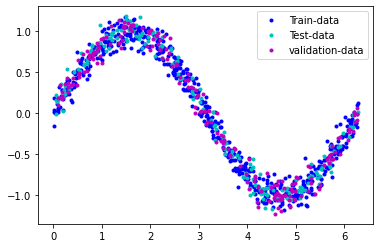

In [10]:
# Ploting three categories
plt.plot(x_train,y_train,'b.',label = "Train-data")
plt.plot(x_test,y_test,'c.',label = "Test-data")
plt.plot(x_validation,y_validation,'m.',label = "validation-data")
plt.legend()
plt.show()


In [11]:
# Using Keras to create a simple model architecture
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()
model_1.add(layers.Dense(16,activation='relu',input_shape=(1,)))
model_1.add(layers.Dense(1))
model_1.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
history_1 = model_1.fit(x_train,y_train,epochs=1000,batch_size=16,validation_data=(x_validation,y_validation))

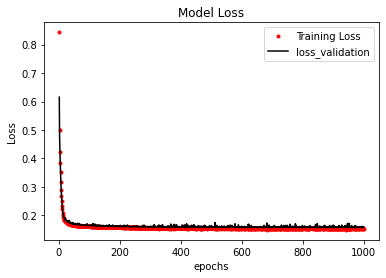

In [13]:
# Summerize history for Loss
loss_train = history_1.history['loss']
loss_validation = history_1.history['val_loss']
epochs = range(1,len(loss_train)+1)
plt.plot(epochs,loss_train,'r.',label='Training Loss')
plt.plot(epochs,loss_validation,'k',label='loss_validation')
plt.title('Model Loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

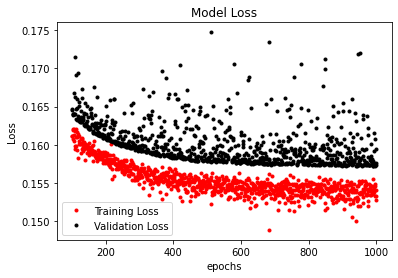

In [14]:
# Displaying model loss with eliminating the first 100 samples
plt.plot(epochs[100:],loss_train[100:],'r.',label='Training Loss')
plt.plot(epochs[100:],loss_validation[100:],'k.',label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

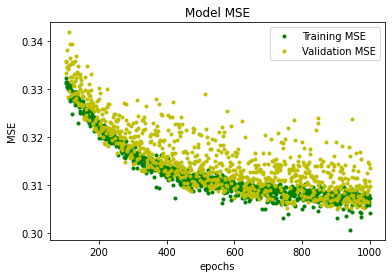

In [15]:
# Summerize history for MSE
MSE_train = history_1.history['mae']
MSE_validation = history_1.history['val_mae']
plt.plot(epochs[100:],MSE_train[100:],'g.',label='Training MSE')
plt.plot(epochs[100:],MSE_validation[100:],'y.',label='Validation MSE')
plt.title('Model MSE')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()

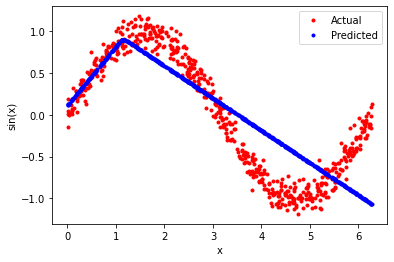

In [16]:
# Predicting labels for traing data
predictions = model_1.predict(x_train)
plt.plot(x_train,y_train,'r.',label='Actual')
plt.plot(x_train,predictions,'b.',label='Predicted')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.show()

In [17]:
# Improving the model by adding an extra layer
from tensorflow.keras import layers
model_2 = tf.keras.Sequential()
model_2.add(layers.Dense(16,activation='relu',input_shape=(1,)))
model_2.add(layers.Dense(16,activation='relu',input_shape=(1,)))
model_2.add(layers.Dense(1))
model_2.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
history_2 = model_2.fit(x_train,y_train,epochs=600,batch_size=16,validation_data=[x_validation,y_validation])

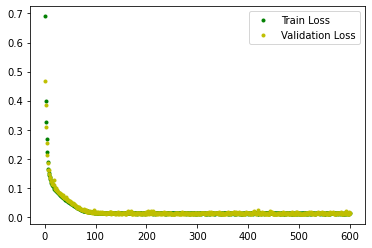

In [19]:
# Summerize history for Loss
loss2_train = history_2.history['loss']
loss2_validation = history_2.history['val_loss']
epochs2 = range(1,len(loss2_train)+1)
plt.plot(epochs2,loss2_train,'g.',label='Train Loss')
plt.plot(epochs2,loss2_validation,'y.',label='Validation Loss')
plt.legend()
plt.show()


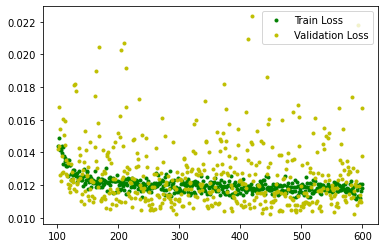

In [20]:
# Displaying model loss with eliminating the first 100 samples
plt.plot(epochs2[100:],loss2_train[100:],'g.',label='Train Loss')
plt.plot(epochs2[100:],loss2_validation[100:],'y.',label='Validation Loss')
plt.legend()
plt.show()

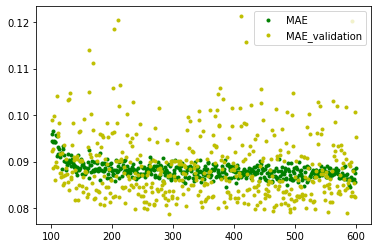

In [21]:
# Displayig Model MSE with eliminating the first 100 samples
mae2 = history_2.history['mae']
mae2_validation = history_2.history['val_mae']
epochs2 = range(1,len(mae2)+1)
plt.plot(epochs2[100:],mae2[100:],'g.',label='MAE')
plt.plot(epochs2[100:],mae2_validation[100:],'y.',label='MAE_validation')
plt.legend()
plt.show()


In [22]:
loss3 = model_2.evaluate(x_test,y_test)

200/200 [==============================] - 0s 187us/sample - loss: 0.0129 - mae: 0.0904


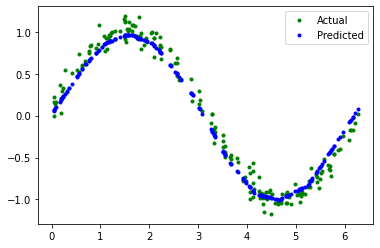

In [23]:
# Predicting labels for the test data
prediction3 = model_2.predict(x_test)
plt.plot(x_test,y_test,'g.',label='Actual')
plt.plot(x_test,prediction3,'b.',label='Predicted')
plt.legend()
plt.show()

In [ ]:
# Converting TensorFlow models into TensorFlow Lite FlatBuffer format
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

In [ ]:
# Saving the model to disk
open('sine_model.tflite','wb').write(tflite_model)

In [ ]:
# Converting the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [28]:
def representative_dataset_generator():
  for value in x_test:
    yield[np.array(value, dtype=np.float32, ndim=2)]
  converter.representative_dataset = representative_dataset_generator
  tflite_model = converter.convert()

In [29]:
# Saving the model to disk
open('sine_model_quantized.tflite','wb').write(tflite_model)

2656

In [30]:
# Instantiating an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

In [31]:
# Allocating memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

In [32]:
# # Getting indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index =sine_model.get_output_details()[0]["index"]

In [33]:
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

In [34]:
# Creating arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []

In [35]:
# Running each model's interpreter for each value and store the results in arrays
for x_value in x_test:
  x_value_tensor = tf.convert_to_tensor([[x_value]],dtype=np.float32)
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  sine_model.invoke()
  sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])
  sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])

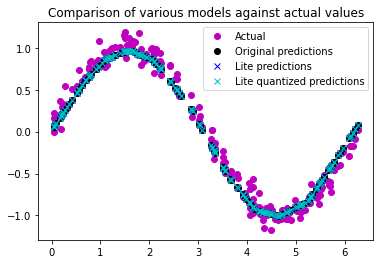

In [40]:
plt.plot(x_test, y_test, 'mo', label='Actual')
plt.plot(x_test, prediction3, 'ko', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'cx', label='Lite quantized predictions')
plt.title('Comparison of various models against actual values')
plt.legend()
plt.show()

In [41]:
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 2656 bytes
Quantized model is 2656 bytes
Difference is 0 bytes


In [42]:
# Converting to a C File
!apt-get -qq install xxd

Selecting previously unselected package xxd.
(Reading database ... 146442 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.4_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.4) ...
Setting up xxd (2:8.0.1453-1ubuntu1.4) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [43]:
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc

In [44]:
!cat sine_model_quantized.cc

unsigned char sine_model_quantized_tflite[] = {
  0x18, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x0e, 0x00,
  0x18, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00,
  0x0e, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x18, 0x0a, 0x00, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x20, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0xbc, 0x05, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00,
  0x54, 0x4f, 0x43, 0x4f, 0x20, 0x43, 0x6f, 0x6e, 0x76, 0x65, 0x72, 0x74,
  0x65, 0x64, 0x2e, 0x00, 0x0b, 0x00, 0x00, 0x00, 0x90, 0x05, 0x00, 0x00,
  0x7c, 0x05, 0x00, 0x00, 0x24, 0x05, 0x00, 0x00, 0xd4, 0x04, 0x00, 0x00,
  0xc4, 0x00, 0x00, 0x00, 0x74, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x14, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0xd8, 0xf6, 0xff, 0xff, 0xdc, 0xf6, 0xff, 0xff,
  0xe0, 0xf6, 0xff, 0xff, 0xe4, 0xf6, 0xff, 0xff, 0xc2, 0xfa, 0xff, 0xff,
  0x04, 0x00, 0x00, 0x00, 0x40, 0x00, 0x00, 0x00, 0x7f, 0xa0, 0x